# Cross-Country Comparison
This notebook compares cleaned solar datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences.

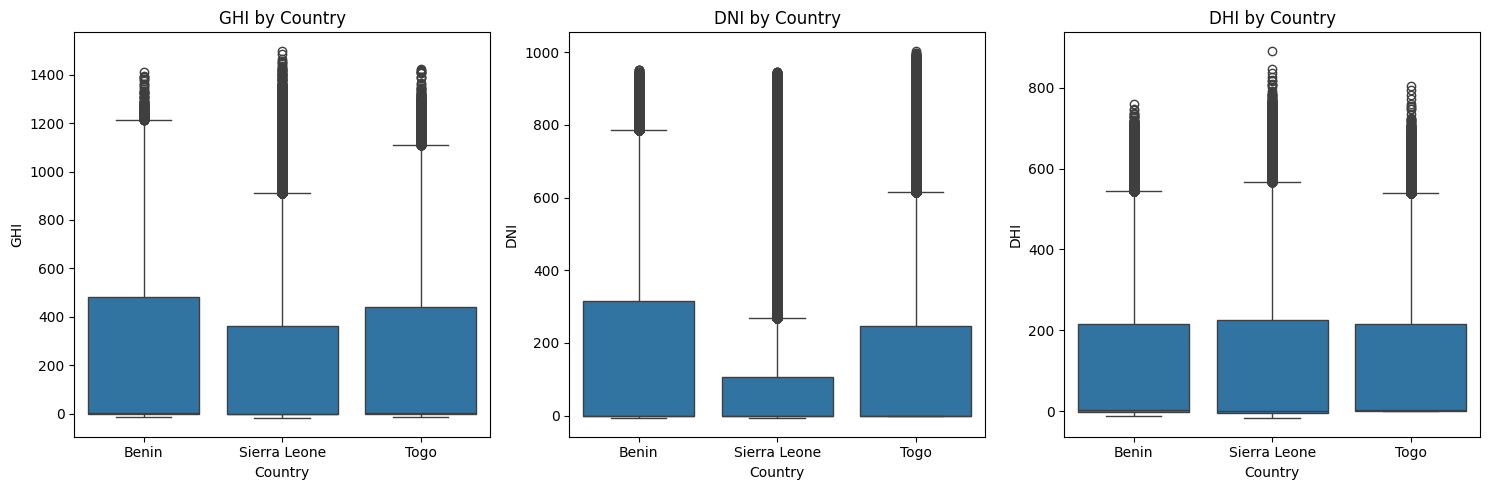


Summary Table (Mean, Median, Std):


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned datasets
benin = pd.read_csv('../data/benin-malanville.csv')
sierra_leone = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo = pd.read_csv('../data/togo-dapaong_qc.csv')

# Add a 'Country' column to each dataset
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine datasets
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

# Boxplots for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=df)
    plt.title(f'{metric} by Country')
plt.tight_layout()
plt.show()

# Summary table of mean, median, std
summary = df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
print("\nSummary Table (Mean, Median, Std):")
display(summary)

In [2]:
from scipy.stats import kruskal

# Kruskal-Wallis test on GHI
ghi_benin = benin['GHI']
ghi_sierra_leone = sierra_leone['GHI']
ghi_togo = togo['GHI']
stat, p_value = kruskal(ghi_benin, ghi_sierra_leone, ghi_togo)
print(f"Kruskal-Wallis Test for GHI:")
print(f"Statistic: {stat:.2f}, p-value: {p_value:.4f}")

Kruskal-Wallis Test for GHI:
Statistic: 4524.88, p-value: 0.0000


## Key Observations
- Benin exhibits the highest median GHI, indicating strong solar potential, but also the greatest variability (highest std), suggesting less consistency.
- Sierra Leone has the lowest average DHI, which may indicate fewer diffuse radiation conditions, potentially due to clearer skies.
- Togo shows moderate GHI and DNI with the least variability, making it a stable candidate for solar energy projects.

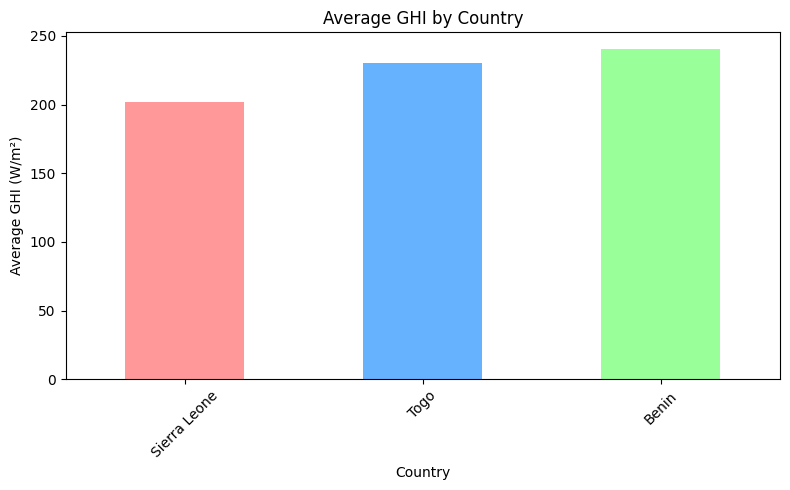

In [3]:
# Bar chart of average GHI by country
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values()
plt.figure(figsize=(8, 5))
avg_ghi.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()